In [3]:
# === IMPORTS PRINCIPAUX ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import glob
import os

# Configuration affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Configuration graphiques
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

print("📌 Imports effectués.")


📌 Imports effectués.


In [4]:
# === Chargement des données ===

# Chemins vers les fichiers
articles_metadata_path = "articles_metadata.csv"
articles_embeddings_path = "articles_embeddings.pickle"
clicks_folder_path = "clicks/"
clicks_sample_path = "clicks_sample.csv"

# Chargement du metadata des articles
articles_df = pd.read_csv(articles_metadata_path)
print("✔️ articles_metadata.csv chargé")
print("Shape :", articles_df.shape)

# Chargement du sample de clics
clicks_sample_df = pd.read_csv(clicks_sample_path)
print("✔️ clicks_sample.csv chargé")
print("Shape :", clicks_sample_df.shape)

# Chargement des embeddings des articles
with open(articles_embeddings_path, "rb") as f:
    articles_embeddings = pickle.load(f)
print("✔️ articles_embeddings.pickle chargé")
print("Type :", type(articles_embeddings))

# Chargement de tous les fichiers de clics
clicks_files = glob.glob(clicks_folder_path + "*.csv")
clicks_df = pd.concat([pd.read_csv(f) for f in clicks_files], ignore_index=True)
print("✔️ Tous les fichiers de clics chargés")
print("Shape :", clicks_df.shape)

print("\n📌 Tous les datasets ont été chargés avec succès.")


✔️ articles_metadata.csv chargé
Shape : (364047, 5)
✔️ clicks_sample.csv chargé
Shape : (1883, 12)
✔️ articles_embeddings.pickle chargé
Type : <class 'numpy.ndarray'>
✔️ Tous les fichiers de clics chargés
Shape : (2988181, 12)

📌 Tous les datasets ont été chargés avec succès.


Aperçu du dataset articles:


,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162



Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364047 entries, 0 to 364046
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   article_id     364047 non-null  int64
 1   category_id    364047 non-null  int64
 2   created_at_ts  364047 non-null  int64
 3   publisher_id   364047 non-null  int64
 4   words_count    364047 non-null  int64
dtypes: int64(5)
memory usage: 13.9 MB
None

Statistiques descriptives:


,article_id,category_id,created_at_ts,publisher_id,words_count
count,364047.000000,364047.000000,3.640470e+05,364047.0,364047.000000
mean,182023.000000,283.108239,1.474070e+12,0.0,190.897727
std,105091.461061,136.723470,4.293038e+10,0.0,59.502766
min,0.000000,0.000000,1.159356e+12,0.0,0.000000
25%,91011.500000,199.000000,1.444925e+12,0.0,159.000000
50%,182023.000000,301.000000,1.489422e+12,0.0,186.000000
75%,273034.500000,399.000000,1.509891e+12,0.0,218.000000
max,364046.000000,460.000000,1.520943e+12,0.0,6690.000000


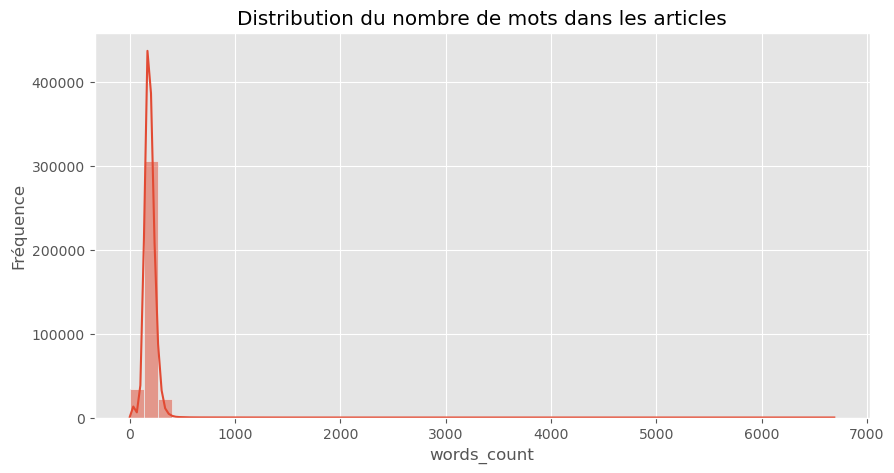

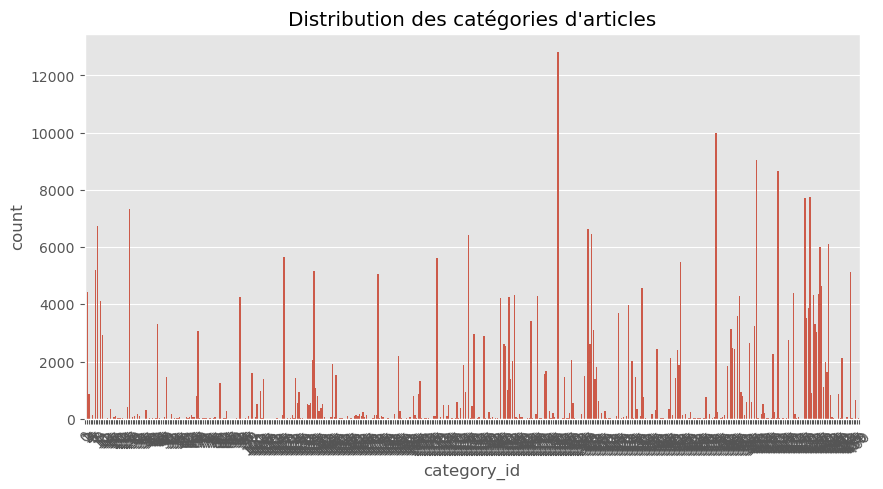

✔️ Analyse du metadata terminée.


In [5]:
# === Exploration du metadata des articles ===

print("Aperçu du dataset articles:")
display(articles_df.head())

print("\nInformations générales:")
print(articles_df.info())

print("\nStatistiques descriptives:")
display(articles_df.describe(include='all'))

# Distribution du nombre de mots dans les articles
plt.figure(figsize=(10,5))
sns.histplot(articles_df['words_count'], bins=50, kde=True)
plt.title("Distribution du nombre de mots dans les articles")
plt.xlabel("words_count")
plt.ylabel("Fréquence")
plt.show()

# Distribution des catégories
plt.figure(figsize=(10,5))
sns.countplot(data=articles_df, x="category_id")
plt.title("Distribution des catégories d'articles")
plt.xticks(rotation=45)
plt.show()

print("✔️ Analyse du metadata terminée.")


Aperçu des clics :


,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2



Information sur clicks_df :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988181 entries, 0 to 2988180
Data columns (total 12 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   user_id              object
 1   session_id           object
 2   session_start        object
 3   session_size         object
 4   click_article_id     object
 5   click_timestamp      object
 6   click_environment    object
 7   click_deviceGroup    object
 8   click_os             object
 9   click_country        object
 10  click_region         object
 11  click_referrer_type  object
dtypes: object(12)
memory usage: 273.6+ MB
None

Statistiques descriptives :


,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
count,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181
unique,322897,1048594,646874,72,46033,2983198,3,5,8,11,28,7
top,5890,1507563657895091,1507563657000,2,160974,1506961009961,4,1,17,1,25,2
freq,1232,124,127,1260372,37213,3,2904478,1823162,1738138,2852406,804985,1602601



✔️ Nombre total de clics : 2,988,181
✔️ Nombre d'utilisateurs uniques : 322,897
✔️ Nombre d'articles uniques cliqués : 46,033


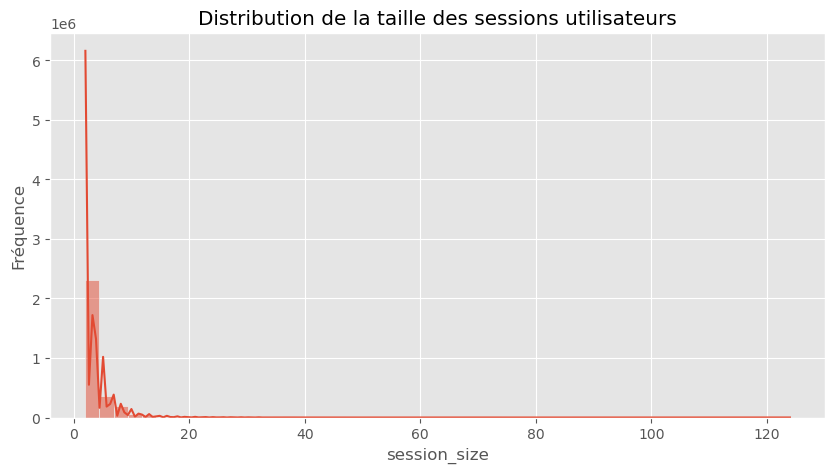

✔️ Analyse des clics terminée.


In [6]:
# === Analyse des données de clics ===

print("Aperçu des clics :")
display(clicks_df.head())

print("\nInformation sur clicks_df :")
print(clicks_df.info())

print("\nStatistiques descriptives :")
display(clicks_df.describe())

# Nombre total de clics
total_clicks = len(clicks_df)
print(f"\n✔️ Nombre total de clics : {total_clicks:,}")

# Nombre total d'utilisateurs uniques
unique_users = clicks_df['user_id'].nunique()
print(f"✔️ Nombre d'utilisateurs uniques : {unique_users:,}")

# Nombre d'articles uniques cliqués
unique_articles_clicked = clicks_df['click_article_id'].nunique()
print(f"✔️ Nombre d'articles uniques cliqués : {unique_articles_clicked:,}")

# Distribution de la taille des sessions
plt.figure(figsize=(10,5))
sns.histplot(clicks_df['session_size'], bins=50, kde=True)
plt.title("Distribution de la taille des sessions utilisateurs")
plt.xlabel("session_size")
plt.ylabel("Fréquence")
plt.show()

print("✔️ Analyse des clics terminée.")


In [7]:
# === Préparation du dataset utilisateur ===

# Garder uniquement les colonnes utiles
clicks_df_small = clicks_df[['user_id', 'session_size', 'click_article_id']].copy()

# Conversion en int
clicks_df_small['user_id'] = clicks_df_small['user_id'].astype(int)
clicks_df_small['session_size'] = clicks_df_small['session_size'].astype(int)
clicks_df_small['click_article_id'] = clicks_df_small['click_article_id'].astype(int)

print("✔️ Colonnes converties en entier")

# Grouper les articles lus par utilisateur
users_df = clicks_df_small.groupby('user_id')['click_article_id'].apply(list).reset_index()

users_df.rename(columns={'click_article_id': 'articles_lus'}, inplace=True)

print("\nAperçu de users_df :")
display(users_df.head())

print("✔️ Création du dataset utilisateur terminée.")
print(f"Nombre d'utilisateurs : {len(users_df):,}")


✔️ Colonnes converties en entier

Aperçu de users_df :


,user_id,articles_lus
0,0,"[157541, 68866, 96755, 313996, 160158, 233470,..."
1,1,"[235840, 96663, 59758, 160474, 285719, 156723,..."
2,2,"[119592, 30970, 30760, 209122]"
3,3,"[236065, 236294, 234686, 233769, 235665, 23513..."
4,4,"[48915, 44488, 195887, 195084, 63307, 336499, ..."


✔️ Création du dataset utilisateur terminée.
Nombre d'utilisateurs : 322,897


✅ Cellule 6 : Exploration des embeddings

On va :

charger les embeddings déjà faits (tu l’as fait plus haut)

vérifier leur structure et leur forme

vérifier que l’ordre des embeddings correspond bien à article_id

In [8]:
# === Exploration des embeddings des articles ===

print("Type des embeddings :", type(articles_embeddings))

# Si c'est un array numpy, on affiche la forme
try:
    print("Shape des embeddings :", articles_embeddings.shape)
except:
    print("Impossible d'afficher .shape → probablement un dictionnaire")

# Si c'est un dict {article_id: vecteur}, on le convertit en DataFrame
if isinstance(articles_embeddings, dict):
    print("✔️ Les embeddings sont un dictionnaire. Conversion en DataFrame...")

    articles_emb_df = pd.DataFrame.from_dict(articles_embeddings, orient='index')

    # s'assurer que l'index est bien entier
    articles_emb_df.index = articles_emb_df.index.astype(int)

    print("Shape :", articles_emb_df.shape)
    display(articles_emb_df.head())

else:
    # Sinon c'est un numpy array → convertir en DataFrame
    print("✔️ Les embeddings sont un tableau numpy. Conversion en DataFrame...")

    articles_emb_df = pd.DataFrame(articles_embeddings)
    
    # Ajouter l'article_id comme index :
    articles_emb_df.index = articles_df['article_id']

    print("Shape :", articles_emb_df.shape)
    display(articles_emb_df.head())


Type des embeddings : <class 'numpy.ndarray'>
Shape des embeddings : (364047, 250)
✔️ Les embeddings sont un tableau numpy. Conversion en DataFrame...
Shape : (364047, 250)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
article_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.161183,-0.957233,-0.137944,0.050855,0.830055,0.901365,-0.335148,-0.559561,-0.500603,0.165183,0.428434,0.355056,0.874437,-0.528883,0.625487,0.268920,-0.822835,-0.703853,-0.625845,-0.152855,-0.666241,0.043295,0.178638,0.046890,0.594531,-0.183348,0.195107,-0.467640,-0.304807,0.353175,0.278188,0.538623,-0.371209,0.489898,-0.103833,0.119174,0.132437,-0.621084,-0.453311,0.346627,-0.061741,-0.730594,-0.384116,-0.940758,0.061342,0.482582,0.289683,-0.622696,-0.050004,0.421512,-0.242576,0.668710,-0.509004,-0.461800,0.043902,0.288487,0.449825,-0.284862,0.916729,0.703129,0.851674,-0.627244,0.357732,0.390189,0.652935,0.103653,0.798293,-0.102546,-0.204514,0.378612,-0.090261,-0.251157,0.325983,0.085880,-0.180565,0.047523,-0.159740,-0.620147,0.300335,-0.796547,0.477719,0.409919,0.327786,0.072571,-0.843388,0.574321,0.331206,0.735199,-0.051149,-0.421304,-0.901532,-0.305270,-0.135569,-0.468175,-0.256514,-0.028035,0.294721,-0.067347,-0.461529,0.072133,-0.570724,-0.059984,-0.550372,-0.603981,0.402523,-0.306480,0.330710,0.142332,0.332905,0.234474,0.690654,0.486343,0.427373,-0.115976,0.385403,0.395713,-0.658583,-0.556005,0.782507,0.128787,0.651136,-0.208351,-0.502591,0.421710,-0.314923,-0.027446,-0.244449,0.809208,0.187824,0.161955,-0.149967,-0.714481,-0.006979,-0.312916,0.944648,0.240193,-0.171939,-0.713158,0.014605,0.299797,-0.723921,-0.376426,0.682718,-0.603598,-0.573565,-0.482323,-0.675051,0.125790,-0.082184,-0.467677,0.872839,0.357698,0.799114,-0.790118,0.496815,0.568437,-0.347814,0.650343,-0.598999,0.421422,0.107382,-0.460307,0.301807,-0.399439,-0.034878,0.123208,-0.001797,-0.215086,-0.408751,0.204728,-0.603654,-0.224667,-0.421210,0.647182,-0.330459,-0.290704,-0.053618,0.516388,0.330178,0.376074,-0.176177,-0.567671,-0.009968,-0.400348,-0.497946,-0.226307,-0.575935,-0.365481,0.292304,0.688886,0.872040,-0.057107,-0.309455,-0.427771,-0.689097,0.653922,-0.417924,-0.130352,-0.938940,-0.611004,0.565940,-0.002798,-0.046364,0.594139,0.169634,0.250593,-0.062823,-0.406424,0.175723,-0.258984,0.764381,0.275644,-0.692138,-0.393240,-0.325693,0.163377,-0.154952,-0.701639,0.711825,-0.839063,-0.459145,0.919913,0.621834,-0.640471,0.389934,0.764178,0.164851,-0.747023,0.411034,0.750901,0.860643,0.614755,0.549660,0.334437,-0.388059,-0.703730,-0.567420,0.006478,-0.206590,-0.385272,0.321248,0.313999,0.636412,0.169179,0.540524,-0.813182,0.286870,-0.231686,0.597416,0.409623
1,-0.523216,-0.974058,0.738608,0.155234,0.626294,0.485297,-0.715657,-0.897996,-0.359747,0.398246,0.672840,-0.011180,-0.347506,-0.541346,0.458492,0.482316,0.713665,-0.474050,0.405787,0.671431,-0.480856,0.434779,0.468499,0.376424,0.368048,0.192545,0.095572,-0.542234,0.065547,0.363267,-0.162804,0.319617,0.469473,0.578466,-0.803637,-0.304545,0.635511,0.089978,-0.569946,0.102307,-0.205229,-0.610886,-0.501508,-0.960480,-0.060595,0.382419,-0.297368,0.409265,-0.217864,0.4

Cellule suivante : Réduction de dimension avec PCA

Objectif :

Passer de 250 dimensions → 70

Garder l’essentiel de l’information

Avoir une matrice plus légère pour le calcul de similarité

Ajoute cette cellule :

Shape avant PCA : (364047, 250)
Shape après PCA : (364047, 70)


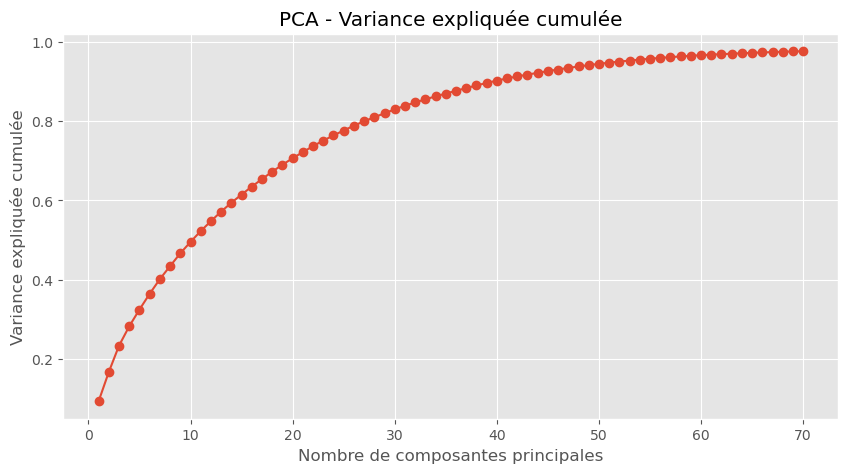

Variance expliquée avec 70 composantes : 97.72%

Aperçu des embeddings réduits :


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
article_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-2.176782,1.316913,-1.029048,0.901907,-1.809543,-2.064713,-1.221915,-0.024442,0.927261,-0.669805,3.325633,0.537081,-0.252130,-0.348473,-0.519578,1.604399,1.407890,0.611139,-0.272775,0.317715,-1.719164,0.657888,0.083428,0.438691,1.165752,-0.073043,-1.015772,0.496051,0.148464,-0.632765,-0.418768,0.173466,-0.447380,0.603006,0.296164,0.405876,0.658224,-0.234396,-0.031010,0.320310,0.100281,-0.901473,-0.409359,0.724184,-0.267677,0.060351,-0.089947,-0.107737,-0.156110,0.098135,0.622265,0.164921,-0.252126,0.332369,0.610105,-0.442537,-0.155499,-0.179365,0.393666,-0.222122,0.230563,-0.100259,0.048754,-0.057861,0.319999,0.528112,-0.112973,-0.419164,-0.001750,-0.066858
1,-1.735173,-0.489893,3.268562,0.087855,1.473059,-0.932711,1.841631,-0.881798,-0.207201,0.816809,0.256935,-2.039328,-0.682872,0.411776,-1.298849,1.479022,-1.051609,-0.687547,-2.197335,0.186501,-1.599596,-0.764460,0.776222,0.173276,-0.388363,-0.720258,0.425500,0.070638,0.600610,0.743686,-0.275809,0.161406,-0.148420,-0.172403,0.886640,1.155865,0.247016,-0.092922,-0.765161,-0.427794,-0.219266,0.536257,-0.345675,0.234225,-0.314743,0.330478,-0.544973,-0.310857,0.207499,0.058549,0.571036,-0.082237,-0.265797,-0.016996,-0.177868,-0.111827,-0.038613,0.167532,0.092190,-0.245872,-0.102164,0.083865,-0.035468,-0.419927,-0.300335,-0.111876,0.144481,0.199037,0.175780,-0.089534
2,-0.912688,2.089339,1.865869,-1.202520,2.530601,-0.521971,0.224352,1.479936,-0.191899,1.356800,0.024057,-0.483602,-0.457253,0.139973,1.577240,0.662688,-0.964210,0.825707,0.203896,-0.780319,-2.396396,-0.524435,0.031346,-1.153767,-0.392500,-1.328224,-0.344275,0.539973,0.458935,0.219561,-1.010812,0.643015,0.314197,0.197376,0.407600,0.268158,0.416175,0.251151,0.374923,-0.260144,0.760382,0.576441,-1.006016,-0.249962,0.012137,0.488644,-0.312059,0.181443,0.446841,0.075686,-0.172042,0.640697,0.057500,0.069819,-0.104515,0.204884,0.050819,-0.370876,0.186895,-0.019858,0.104982,0.102672,0.192432,-0.219692,-0.141884,-0.136364,-0.145218,-0.142428,-0.067774,-0.274822
3,1.096568,-0.212955,4.183517,-0.649575,-0.130866,1.126554,1.063997,-0.662876,0.348142,1.463900,1.068103,-1.088828,-0.187241,-0.375097,1.606753,-0.107150,-0.835994,0.672974,0.832871,0.391241,-0.652925,-1.746469,-0.101891,-0.911817,-1.899542,-1.182446,-0.730839,1.270822,1.042484,0.475361,-1.356862,0.206188,0.919607,0.612198,1.446414,-0.174692,-0.102415,-0.988861,0.389334,-0.229397,0.584633,0.377420,-0.315410,0.435519,-0.041551,0.447302,-0.178354,-0.255307,0.092586,0.544007,-0.082052,0.856982,-0.007508,0.066602,-0.483651,-0.314209,-0.159641,-0.129977,0.060362,0.244907,0.180049,-0.028683,-0.371260,0.104961,-0.366049,0.295609,-0.351971,-0.044040,0.055244,0.292915
4,0.193785,0.263949,1.896583,-1.834345,1.270377,-1.723297,0.329006,0.283795,-0.659808,1.223740,-0.796710,-1.201116,-1.507385,0.612703,-0.204325,1.138230,-1.914073,0.520347,-0.528313,-0.030476,-1.450480,-1.121259,-1.151662,-1.349682,-1.767041,-2.096298,-0.392205,1.676677,0.204564,0.032603,-0.783241,-0.538631,0.278733,0.144274,1.568315,0.958242,0.938802,-0.633338,-0.192695,-0.069260,0.172252,1.573488,-0.264651,0.111269,-1.088534,0.247204,-0.418068,-0.391186,-0.186282,0.012689,-0.130891,0.150834,0.321230,0.015989,-0.181446,0.009165,-0.165061,-0.091432,-0.059174,-0.186989,0.448668,-0.348877,0.222747,0.081643,-0.405907,-0.120979,-0.379417,0.106976,-0.154590,0.133179


In [9]:
from sklearn.decomposition import PCA
import numpy as np

# === Réduction de dimension des embeddings par PCA ===

n_components = 70  # comme dans le notebook de l'étudiant

pca = PCA(n_components=n_components)

# On applique la PCA sur la matrice d'embeddings
articles_emb_pca_array = pca.fit_transform(articles_emb_df.values)

print("Shape avant PCA :", articles_emb_df.shape)
print("Shape après PCA :", articles_emb_pca_array.shape)

# Variance expliquée cumulée
explained_variance_ratio = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10,5))
plt.plot(range(1, n_components + 1), cum_var, marker="o")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.title("PCA - Variance expliquée cumulée")
plt.grid(True)
plt.show()

print(f"Variance expliquée avec {n_components} composantes : {cum_var[-1]*100:.2f}%")

# Conversion en DataFrame, index = article_id
articles_emb_pca = pd.DataFrame(
    articles_emb_pca_array,
    index=articles_emb_df.index
)

print("\nAperçu des embeddings réduits :")
display(articles_emb_pca.head())


✅ Étape suivante : fonction de recommandation "content-based"

Idée :

On prend un user_id

On récupère les articles qu’il a déjà lus

On prend les embeddings PCA de ces articles

On calcule la similarité cosinus avec tous les autres articles

On renvoie les 5 articles les plus similaires qu’il n’a pas encore lus

On va utiliser articles_emb_pca (embeddings réduits) et clicks_df_small / users_df.

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# === Modèle de recommandation content-based ===

def content_based_recommend_articles(user_id, 
                                     articles_embeddings_df, 
                                     clicks_df,
                                     n_reco=5):
    """
    Recommande n_reco articles à un utilisateur 
    sur la base des similarités de contenu (embeddings).
    
    Paramètres
    ----------
    user_id : int
        Identifiant de l'utilisateur
    articles_embeddings_df : DataFrame
        Matrice d'embeddings (index = article_id, colonnes = dimensions PCA)
    clicks_df : DataFrame
        DataFrame avec au moins ['user_id', 'click_article_id']
    n_reco : int
        Nombre d'articles à recommander
    """
    
    # 1) Récupérer les articles lus par l'utilisateur
    articles_read = clicks_df[clicks_df['user_id'] == user_id]['click_article_id'].unique().tolist()
    
    if len(articles_read) == 0:
        print("⚠️ Cet utilisateur n'a encore lu aucun article.")
        return []
    
    # Ne garder que les articles qui existent dans la matrice d'embeddings
    articles_read = [a for a in articles_read if a in articles_embeddings_df.index]
    
    if len(articles_read) == 0:
        print("⚠️ Aucun des articles lus par cet utilisateur n'a d'embedding.")
        return []
    
    # 2) Embeddings des articles lus
    emb_read = articles_embeddings_df.loc[articles_read]
    
    # 3) Candidats = tous les articles sauf ceux déjà lus
    candidates = articles_embeddings_df.drop(index=articles_read, errors='ignore')
    
    # 4) Similarité cosinus entre articles lus et candidats
    sim_matrix = cosine_similarity(emb_read.values, candidates.values)
    
    # On agrège en prenant la similarité max pour chaque article candidat
    sim_scores = sim_matrix.max(axis=0)  # un score par article candidat
    
    # 5) On récupère les indices des meilleurs scores
    best_indices = np.argsort(sim_scores)[::-1][:n_reco]
    
    # 6) On mappe vers les article_id
    recommended_article_ids = candidates.index[best_indices].tolist()
    
    return recommended_article_ids


🧪 Petit test rapide

In [11]:
# === Test du modèle content-based ===

# Choisir un utilisateur au hasard
user_test_id = users_df.sample(1)['user_id'].iloc[0]
print("🧑‍💻 Utilisateur de test :", user_test_id)

reco_ids = content_based_recommend_articles(
    user_id=user_test_id,
    articles_embeddings_df=articles_emb_pca,
    clicks_df=clicks_df_small,
    n_reco=5
)

print("\nArticles recommandés (IDs) :", reco_ids)

# Afficher quelques infos sur les articles recommandés
reco_details = articles_df[articles_df['article_id'].isin(reco_ids)]
print("\nDétails des articles recommandés :")
display(reco_details)


🧑‍💻 Utilisateur de test : 15620

Articles recommandés (IDs) : [331634, 331635, 230355, 96581, 237482]

Détails des articles recommandés :


,article_id,category_id,created_at_ts,publisher_id,words_count
96581,96581,209,1506693962000,0,234
230355,230355,375,1433100435000,0,170
237482,237482,375,1484285697000,0,128
331634,331634,436,1509129176000,0,225
331635,331635,436,1507748954000,0,279


✅ Étape suivante : préparer les fichiers “propres” pour le déploiement

L’idée :

garder uniquement ce dont on aura besoin côté modèle / Azure :

articles_df : infos sur les articles

articles_emb_pca : embeddings réduits (70 dims)

clicks_df_small : historique minimal user ↔ article

les sauvegarder dans un dossier data_prepared/ (ou data/azure/, comme tu veux)

🟦 Cellule : sauvegarde des données préparées

In [12]:
# === Sauvegarde des données préparées pour la modélisation / déploiement ===

import os

prepared_dir = "data_prepared"
os.makedirs(prepared_dir, exist_ok=True)

# 1) Metadata des articles
articles_path = os.path.join(prepared_dir, "articles_metadata_clean.csv")
articles_df.to_csv(articles_path, index=False)
print("✔️ articles_df sauvegardé dans :", articles_path)

# 2) Embeddings PCA
emb_pca_path = os.path.join(prepared_dir, "articles_embeddings_pca.pkl")
articles_emb_pca.to_pickle(emb_pca_path)
print("✔️ articles_emb_pca sauvegardé dans :", emb_pca_path)

# 3) Clics simplifiés (user_id, session_size, click_article_id)
clicks_small_path = os.path.join(prepared_dir, "clicks_clean.csv")
clicks_df_small.to_csv(clicks_small_path, index=False)
print("✔️ clicks_df_small sauvegardé dans :", clicks_small_path)

print("\n📁 Tous les fichiers préparés sont prêts pour le notebook de modélisation / le déploiement.")


✔️ articles_df sauvegardé dans : data_prepared\articles_metadata_clean.csv
✔️ articles_emb_pca sauvegardé dans : data_prepared\articles_embeddings_pca.pkl
✔️ clicks_df_small sauvegardé dans : data_prepared\clicks_clean.csv

📁 Tous les fichiers préparés sont prêts pour le notebook de modélisation / le déploiement.


🔝 Top 10 des articles les plus lus :


,article_id,nb_clicks,category_id,created_at_ts,publisher_id,words_count
0,160974,37213,281,1506912747000,0,259
1,272143,28943,399,1506961870000,0,184
2,336221,23851,437,1507613161000,0,158
3,234698,23499,375,1507618597000,0,183
4,123909,23122,250,1507198955000,0,240
5,336223,21855,437,1507555700000,0,122
6,96210,21577,209,1507798791000,0,274
7,162655,21062,281,1506949610000,0,245
8,183176,20303,301,1507731529000,0,285
9,168623,19526,297,1507144050000,0,157


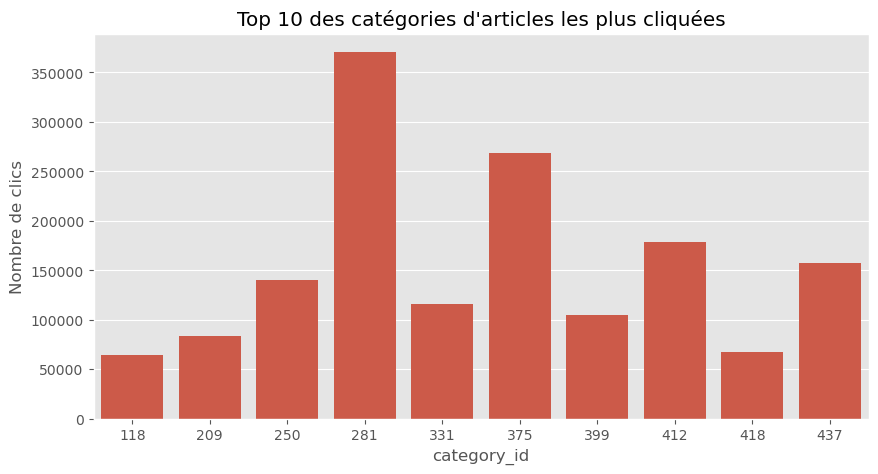

In [13]:
# === A. Articles les plus lus & catégories les plus populaires ===

# Top 10 des articles les plus cliqués
top_articles = (clicks_df_small['click_article_id']
                .value_counts()
                .head(10)
                .rename_axis('article_id')
                .reset_index(name='nb_clicks'))

top_articles_details = top_articles.merge(articles_df, on='article_id', how='left')

print("🔝 Top 10 des articles les plus lus :")
display(top_articles_details)

# Top 10 des catégories les plus cliquées
clicks_with_cat = clicks_df_small.merge(articles_df[['article_id', 'category_id']],
                                        left_on='click_article_id',
                                        right_on='article_id',
                                        how='left')

top_categories = (clicks_with_cat['category_id']
                  .value_counts()
                  .head(10)
                  .rename_axis('category_id')
                  .reset_index(name='nb_clicks'))

plt.figure(figsize=(10,5))
sns.barplot(data=top_categories, x='category_id', y='nb_clicks')
plt.title("Top 10 des catégories d'articles les plus cliquées")
plt.xlabel("category_id")
plt.ylabel("Nombre de clics")
plt.show()


t-SNE sur un échantillon de 2000 articles...


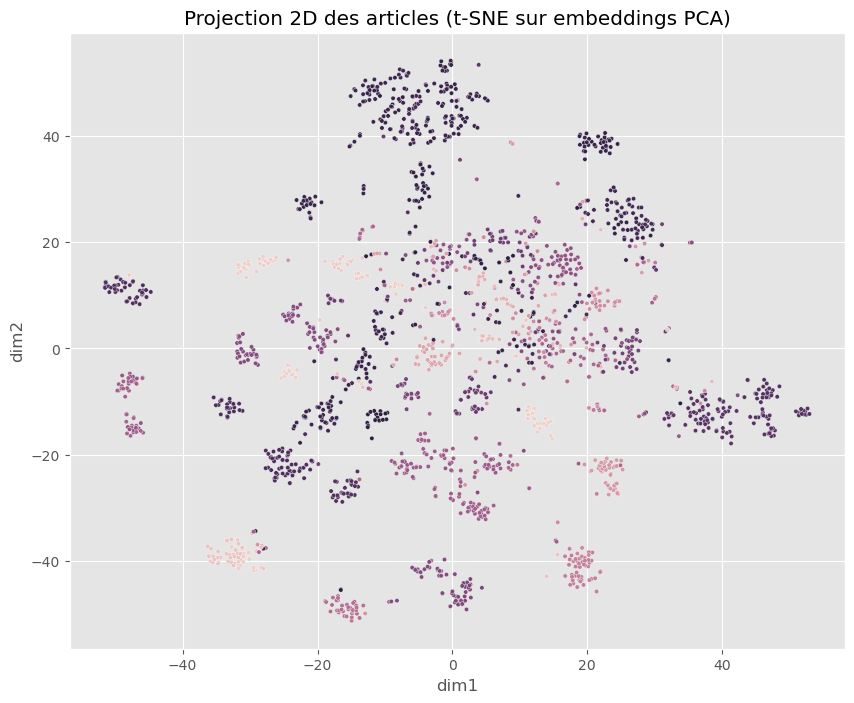

In [14]:
# === B. Visualisation 2D des embeddings (t-SNE sur un échantillon) ===

from sklearn.manifold import TSNE

# Échantillon pour des raisons de temps de calcul
n_samples = 2000
sample_articles = articles_emb_pca.sample(n=n_samples, random_state=42)

print(f"t-SNE sur un échantillon de {n_samples} articles...")

tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42)
emb_2d = tsne.fit_transform(sample_articles.values)

tsne_df = pd.DataFrame(emb_2d, columns=['dim1', 'dim2'])
tsne_df['article_id'] = sample_articles.index

# Ajouter la catégorie pour colorer les points
tsne_df = tsne_df.merge(articles_df[['article_id', 'category_id']], on='article_id', how='left')

plt.figure(figsize=(10,8))
sns.scatterplot(data=tsne_df, x='dim1', y='dim2',
                hue='category_id', legend=False, s=10)
plt.title("Projection 2D des articles (t-SNE sur embeddings PCA)")
plt.xlabel("dim1")
plt.ylabel("dim2")
plt.show()


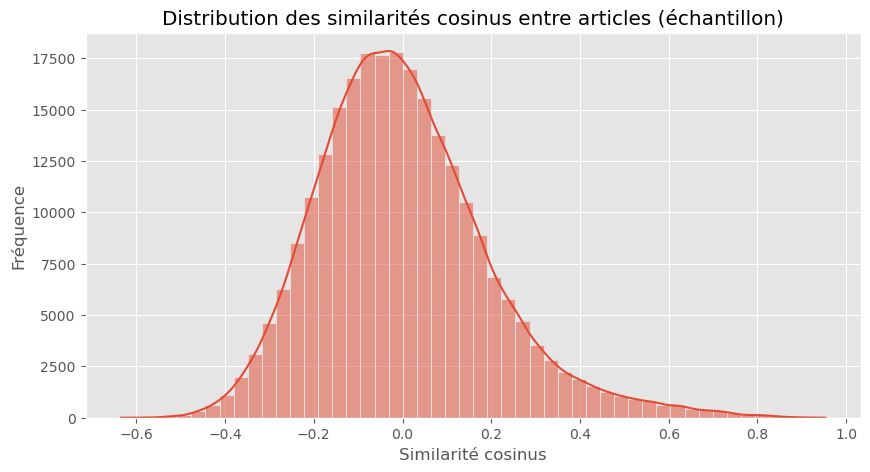

Similarité moyenne : 0.000
Similarité min : -0.635
Similarité max (hors diagonale) : 0.953


In [15]:
# === C. Distribution des similarités cosinus entre articles ===

from sklearn.metrics.pairwise import cosine_similarity

# On prend un petit sous-ensemble d'articles pour ne pas exploser la RAM
subset_size = 500
subset_emb = articles_emb_pca.sample(n=subset_size, random_state=0)

# Matrice de similarité cosinus (subset_size x subset_size)
sim_matrix = cosine_similarity(subset_emb.values)

# On enlève la diagonale (similarité parfaite avec soi-même = 1)
mask = ~np.eye(sim_matrix.shape[0], dtype=bool)
sim_values = sim_matrix[mask]

plt.figure(figsize=(10,5))
sns.histplot(sim_values, bins=50, kde=True)
plt.title("Distribution des similarités cosinus entre articles (échantillon)")
plt.xlabel("Similarité cosinus")
plt.ylabel("Fréquence")
plt.show()

print(f"Similarité moyenne : {sim_values.mean():.3f}")
print(f"Similarité min : {sim_values.min():.3f}")
print(f"Similarité max (hors diagonale) : {sim_values.max():.3f}")


In [16]:
# === D. Baselines simples : articles populaires vs aléatoires ===

# Baseline 1 : recommander les articles les plus lus globalement
popular_articles = (clicks_df_small['click_article_id']
                    .value_counts()
                    .head(5)
                    .index
                    .tolist())

print("📌 Baseline 'populaire' (5 articles les plus lus globalement) :", popular_articles)

popular_details = articles_df[articles_df['article_id'].isin(popular_articles)]
print("\nDétails des articles populaires :")
display(popular_details)

# Baseline 2 : recommander 5 articles aléatoires
random_articles = (articles_df['article_id']
                   .sample(5, random_state=0)
                   .tolist())

print("\n🎲 Baseline 'aléatoire' (5 articles tirés au hasard) :", random_articles)

random_details = articles_df[articles_df['article_id'].isin(random_articles)]
print("\nDétails des articles aléatoires :")
display(random_details)


📌 Baseline 'populaire' (5 articles les plus lus globalement) : [160974, 272143, 336221, 234698, 123909]

Détails des articles populaires :


,article_id,category_id,created_at_ts,publisher_id,words_count
123909,123909,250,1507198955000,0,240
160974,160974,281,1506912747000,0,259
234698,234698,375,1507618597000,0,183
272143,272143,399,1506961870000,0,184
336221,336221,437,1507613161000,0,158



🎲 Baseline 'aléatoire' (5 articles tirés au hasard) : [181932, 6245, 313837, 171070, 97803]

Détails des articles aléatoires :


,article_id,category_id,created_at_ts,publisher_id,words_count
6245,6245,6,1417690563000,0,202
97803,97803,216,1437024112000,0,181
171070,171070,299,1459502786000,0,158
181932,181932,301,1507649455000,0,182
313837,313837,431,1515781621000,0,235
